## 1> Introduction:
Human body is composed of numerous types of cells and are required for healthy functioning of body.But if there are 
few extra cells present then they can form a mass of tissue which is called tumor.A brain tumor is a collection of abnormal cells.Tumors can be benign or malignant(leads to cancer eventually).The conventional method to identify tumour is to do MRI(Magnetic Resonance Imaging) and then radiologists checking if tumour is present or not but their calculation can be mislead by noise or distortions so automated detection method is to required.
The proposed work is divided into 3 sections:
i)   Pre-processing steps are applied on the brain MRI images
ii)  Texture features are extracted using Gray Level Co-occurence Matrix(GLCM)
iii) Classification using SVM machine algorithm.
## 2> Symptoms:
1. New onset or change in pattern of headaches
2. Headaches that gradually become more frequent and more severe
3. Unexplained nausea or vomiting
4. Vision problems, such as blurred vision, double vision or loss of peripheral vision
5. Gradual loss of sensation or movement in an arm or a leg
6. Difficulty with balance
7. Speech difficulties
8. Feeling very tired
9. Confusion in everyday matters
10. Difficulty making decisions
## 3> Objective:
1. To capture MRI images to analyse the presence of tumour using ML techniques.
2. To perform segmentation process on MRI images to separate the tumour from normal brain tissues.
3. To extract features from captured images to find the tumour.
4. To detect tumour.
## 4> Problem Statement:
Brain Tumor Detection using Support Vector Machine in Python

### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [13]:
import os                                     # Python os system function allows us to run a command in the Python script, just like if I was running it in my shell.
path = os.listdir('C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [14]:
import cv2  # OpenCV has a function to read video, which is cv2
X = []      # python list append all images
Y = []      # python list append all target of images
for cls in classes:
    pth = 'C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Training/' +cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [15]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [16]:
# finds the unique elements of an array and returns these unique elements as a sorted array
np.unique(Y) 

array([0, 1])

In [17]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [18]:
X.shape, X_updated.shape # converting this in 2 dimension because sklearn works on only 2 dimension

((1222, 200, 200), (1222, 40000))

### Visualize data

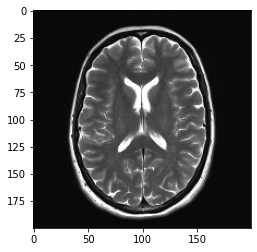

In [21]:
# The matplotlib function imshow() creates an image from a 2-dimensional numpy array. 
# The image will have one square for each element of the array. 
# The color of each square is determined by the value of the corresponding array element and 
# the color map used by imshow()
plt.imshow(X[5], cmap='gray')

### Prepare data

In [22]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [23]:
# random_state is basically used for reproducing your problem the same every time it is run. 
# If you do not use a random_state in train_test_split, every time you make the split you might get a different set 
# of train and test data points and will not help you in debugging in case you get an issue.
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20) 
# 20% data as testing and 80% for training
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [24]:
# In RGB, a color is defined as a mixture of pure red, green, and blue lights of various strengths. 
# Each of the red, green and blue light levels is encoded as a number in the range 0.. 255, 
# with 0 meaning zero light and 255 meaning maximum light.
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Train Model

In [25]:
# Classifier, is a supervised machine learning algorithm typically used for classification tasks. 
# SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane 
# that divides the data into two classes.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
import warnings
warnings.filterwarnings('ignore')
# A tuning parameter (λ), sometimes called a penalty parameter, 
# controls the strength of the penalty term in logistic regression. 
# It is basically the amount of shrinkage, where data values are shrunk towards a central point, like the mean.
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [27]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [28]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [29]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


### Prediction

In [32]:
# where function to check that where the prediction is not equal to actual label
pred = sv.predict(xtest)

In [31]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [36]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36])
print(ytest[36])


Total Misclassified Samples:  9
0
1


In [37]:
print(pred[68])
print(ytest[68])

1
0


### TEST MODEL

In [38]:
classes = {0:'No Tumor', 1:'Positive Tumor'}

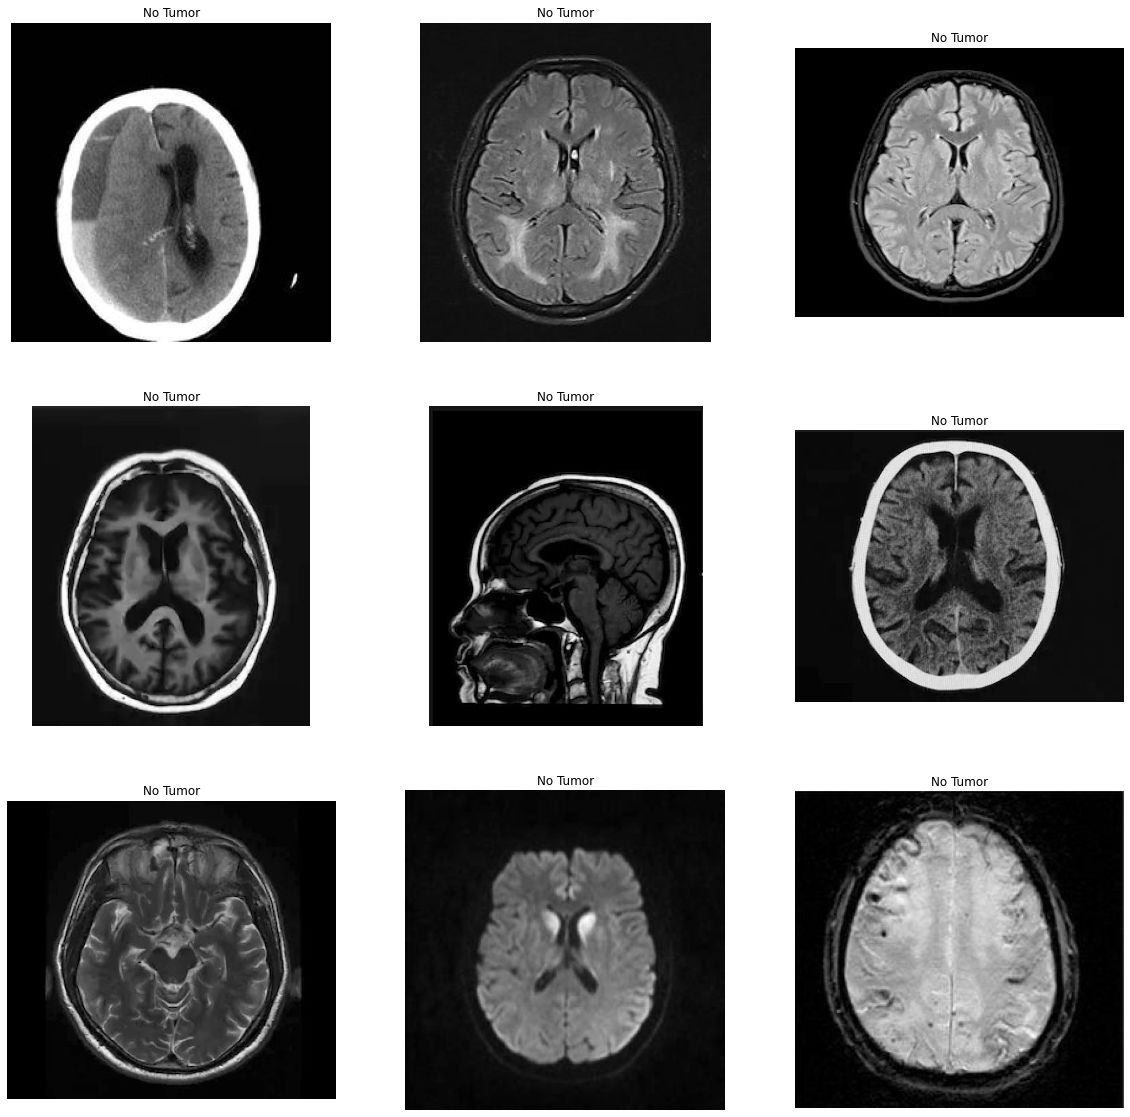

In [44]:
plt.figure(figsize=(20,20))
p = os.listdir('C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Testing')
c=1
for i in os.listdir('C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Testing/no_tumor/')[:9]: # for 0 to 9 images
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    
    p = sv.predict(img1)
    plt.title(classes[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

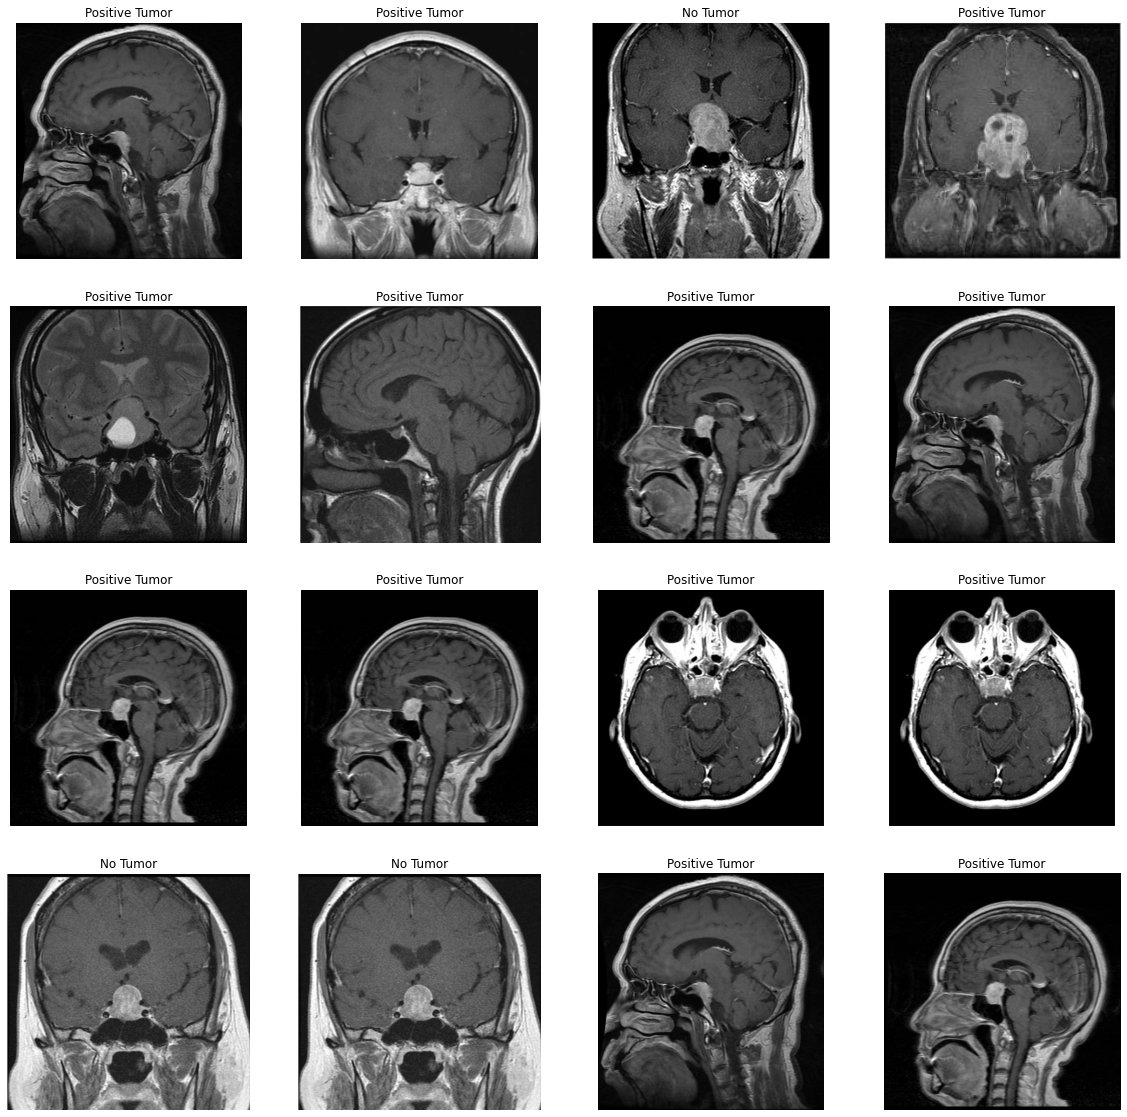

In [46]:
plt.figure(figsize=(20,20))
p = os.listdir('C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Testing')
c=1
for i in os.listdir('C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/DEVARSHI SHAH/Desktop/vs code/ML/data/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(classes[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1